<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Prachiti Atigre <br>
<b>NetID</b>: 02 <br>
<b>Notes to Grader</b> (optional):<br>
<br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: PA    

<h3>Grader Notes</h3>
<b>Your Grade<b>:60/60<br>
<b>Grader Initials</b>:YM<br>
<b>Grader Comments</b> (optional):<br>
</div>

# Lab 5: Multivariate Linear Regression

### Due Date: Thursday April 21, 2020 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on new data


## Initialize

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains housing data. 

# Task 1 - Initialization
Read the file into a dataframe and keep only some features. We will be doing univariate and multivariate regression on housing data.The goal is to find a model that will allow us to predict hosuing prices given certain values.

### Activity 1.1  Read Data

In [2]:
import pandas as pd
df=pd.read_csv('data/USA_Housing.csv', sep=',')
df
df_adjusted = df[["Avg. Area House Age", "Avg. Area Number of Rooms", "Price"]]
df_adjusted
# keep only the columns "Avg. Area House Age" and "Avg. Area Number of Rooms" and Price

,Avg. Area House Age,Avg. Area Number of Rooms,Price
0,5.682861,7.009188,1.059034e+06
1,6.002900,6.730821,1.505891e+06
2,5.865890,8.512727,1.058988e+06
3,7.188236,5.586729,1.260617e+06
4,5.040555,7.839388,6.309435e+05
...,...,...,...
4995,7.830362,6.137356,1.060194e+06
4996,6.999135,6.576763,1.482618e+06
4997,7.250591,4.805081,1.030730e+06
4998,5.534388,7.130144,1.198657e+06


In [3]:
## Split the data into training (90%) and testing (10%)
lengthOfDf = len(df_adjusted)
ninetyLen = int(0.9*lengthOfDf)

df_training = df_adjusted.iloc[:ninetyLen]
df_testing = df_adjusted.iloc[ninetyLen:]    # we will be using test data later in this assignment

display(df_training)
display(df_testing)

,Avg. Area House Age,Avg. Area Number of Rooms,Price
0,5.682861,7.009188,1.059034e+06
1,6.002900,6.730821,1.505891e+06
2,5.865890,8.512727,1.058988e+06
3,7.188236,5.586729,1.260617e+06
4,5.040555,7.839388,6.309435e+05
...,...,...,...
4495,5.425916,7.691914,1.331897e+06
4496,6.420174,8.016993,1.472338e+06
4497,7.098642,8.120948,1.130221e+06
4498,7.371844,6.219345,9.074625e+05


,Avg. Area House Age,Avg. Area Number of Rooms,Price
4500,5.805220,7.384764,1.441577e+06
4501,6.421532,5.613752,8.202504e+05
4502,7.680416,6.387694,1.293462e+06
4503,5.148301,5.573351,1.288123e+06
4504,6.229227,6.048692,1.361008e+06
...,...,...,...
4995,7.830362,6.137356,1.060194e+06
4996,6.999135,6.576763,1.482618e+06
4997,7.250591,4.805081,1.030730e+06
4998,5.534388,7.130144,1.198657e+06


### Activity 1.2 Normalize Data
In this task, you need to normalize df_training data using MinMaxScaler from sklearn.preprocessing. Normalize all df_training data columns to be between 0 and 1. X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices. We saved the final values in x and y, here x[0] must be average house age scaled values and x[1] must be average area number of rooms. 

In [4]:
# BEGIN SOLUTION

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X1 = min_max_scaler.fit_transform(np.array(df_training["Avg. Area House Age"]).reshape(-1,1))
X2 = min_max_scaler.fit_transform(np.array(df_training["Avg. Area Number of Rooms"]).reshape(-1,1))
Y = min_max_scaler.fit_transform(np.array(df_training[["Price"]]).reshape(-1,1))

X_scaled_values = np.array([X1, X2])
Y_scaled_values = Y

# END SOLUTION

# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

print(x[0])
print("")
print(x[1])
print("")
print(y)

[[0.44198584]
 [0.48853836]
 [0.46860901]
 ...
 [0.64792404]
 [0.68766381]
 [0.52977086]]

[[0.50150158]
 [0.46450137]
 [0.70135011]
 ...
 [0.64927528]
 [0.39651666]
 [0.36050192]]

[[0.42521032]
 [0.60736859]
 [0.42519175]
 ...
 [0.45422951]
 [0.36342343]
 [0.6383195 ]]


### Activity 1.3 Plot the feature data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable. Plot housing prices vs "Avg. Area House Age" and "Avg. Area Number of Rooms"

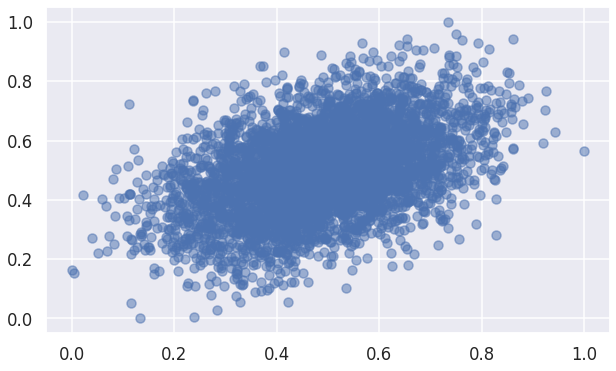

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area House Age" and y = price
### BEGIN SOLUTION

plt.figure(figsize=(9,6))
plt.scatter(x[0], y, alpha=0.5)
plt.show()

### END SOLUTION

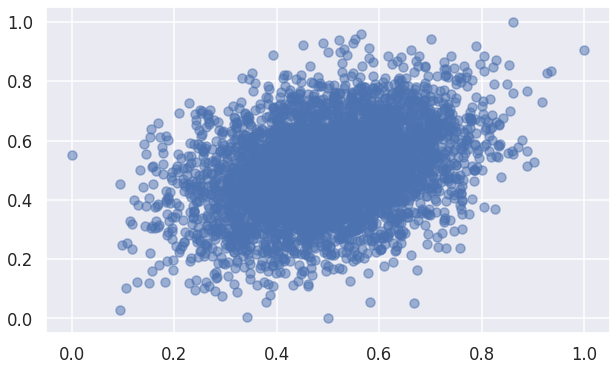

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area Number of Rooms" and y = price
### BEGIN SOLUTION

plt.figure(figsize=(9,6))
plt.scatter(x[1], y, alpha=0.5)
plt.show()

### END SOLUTION

## Question 1.4
##### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression to predict housing prices? Why?

Yes, I think it is fine to use linear regression to predict housing prices since there is a correlation between the average area house age and the average number of rooms. Greater the average number of rooms, larger the average area house age.
##### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [7]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    return theta0 + theta1*x

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [8]:
import numpy as np

## BEGIN SOLUTION
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """
    htheta = h(theta0, theta1, x)
    ans = np.sum(np.power((htheta-y),2))
    return ans
    
## END SOLUTION

## testing
print(sqerror(x[0], y, 0.29,0.52))
print(sqerror(x[1], y, 0.29,0.52))

84.87387899519454
97.4450838371939


### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [9]:
import numpy as np
import math

## BEGIN SOLUTION
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
    htheta = h(theta0, theta1, x)
    value = abs(htheta-y)
    ans = np.sum(value)
    return ans

## END SOLUTION

## testing
print(abserror(x[1], y, 0.29,0.52))

528.7414125084117


### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
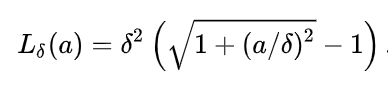
The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [10]:
import numpy as np
import math

## BEGIN SOLUTION
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    htheta = h(theta0, theta1, x)
    a = abs(htheta-y)
    
    insidePara = (np.sqrt(1+(np.power(a/delta,2))) - 1)
    ans = np.sum((np.power(delta,2))*insidePara)
    return ans

## END SOLUTION

## testing
print(huberror(x[0], y, 0.29,0.52,0.1))

26.11691213088487


### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [11]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [12]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x[0]) 
    # compose plot
    pylab.plot(x[0],y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[0], y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x[0], y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x[0], y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = x[0]   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [13]:
# BEST VALUES FOR AVE SQUARE ERROR
theta0 = 0.30
theta1 = 0.40
error = 465.1742
# BEST VALUES FOR AVE ABS ERROR
theta0 = 0.30
theta1 = 0.40
error = 75.336923
# BEST VALUES FOR AVE HUBER ERROR
theta0 = 0.30
theta1 = 0.40
error = 4.2549

# Task 3 - Gradient Descent - Univariate
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [14]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN SOLUTION  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    sum_theta0 = lambda a,b : float(sum(h(a,b,x)-y for x,y in zip(obsX, obsY)))
    sum_theta1 = lambda a,b : float(sum((h(a,b,x)-y)*x for x,y in zip(obsX, obsY)))

    prev_theta0 = 0
    prev_theta1 = 1
    
    old_error = sqerror(obsX, obsY, prev_theta0, prev_theta1)
    new_error = old_error + 1
    
    iterations = 0
    
    print(f'iter_num = {iterations}, theta0 = {prev_theta0}, theta1 = {prev_theta1}')
    
    while abs(new_error - old_error) >= threshold:

        theta0 = prev_theta0 - alpha * sum_theta0(prev_theta0, prev_theta1)
        theta1 = prev_theta1 - alpha * sum_theta1(prev_theta0, prev_theta1)
        
        new_error = sqerror(obsX, obsY, theta0, theta1)
        old_error = sqerror(obsX, obsY, prev_theta0, prev_theta1)
        
        prev_theta0 = theta0
        prev_theta1 = theta1
        
        iterations += 1
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, newError = {new_error}')

    return [theta0, theta1, new_error, iterations]
    
# END SOLUTION

[theta0,theta1,newError,iterations] = gd2(x[0],y,0.0001,0.0001)
print("theta0: ", theta0)
print("theta1: ", theta1)
print("newError: ", newError)
print("iterations: ", iterations)

iter_num = 0, theta0 = 0, theta1 = 1
iter_num = 1, theta0 = 0.005157595237283674, theta1 = 0.9973770327845589, newError = 103.10904497673175
iter_num = 2, theta0 = 0.008566857621240787, theta1 = 0.9939304883547526, newError = 102.65370423760729
iter_num = 3, theta0 = 0.011194321097619734, theta1 = 0.9901369428850233, newError = 102.2319484854191
iter_num = 4, theta0 = 0.013467544345644625, theta1 = 0.986207053885582, newError = 101.82176780098239
iter_num = 5, theta0 = 0.015575698806316728, theta1 = 0.9822338650163356, newError = 101.41878117500332
iter_num = 6, theta0 = 0.017602517651248904, theta1 = 0.978258400746189, newError = 101.02205740402113
iter_num = 7, theta0 = 0.019585098619959003, theta1 = 0.9742986786191262, newError = 100.63134127203057
iter_num = 8, theta0 = 0.02153991229936429, theta1 = 0.970362541264101, newError = 100.24651090271654
iter_num = 9, theta0 = 0.023474305492500184, theta1 = 0.9664533319379448, newError = 99.86747158691202
iter_num = 10, theta0 = 0.0253915

iter_num = 83, theta0 = 0.1323689704930097, theta1 = 0.7457519317841895, newError = 83.13457001620198
iter_num = 84, theta0 = 0.13346203514995034, theta1 = 0.743536480349254, newError = 83.01297052993695
iter_num = 85, theta0 = 0.1345468463776697, theta1 = 0.7413377571759958, newError = 82.89320043911633
iter_num = 86, theta0 = 0.13562346649553148, theta1 = 0.7391556359539327, newError = 82.77523222152111
iter_num = 87, theta0 = 0.13669195735234307, theta1 = 0.7369899913263184, newError = 82.65903876898851
iter_num = 88, theta0 = 0.13775238032990864, theta1 = 0.7348406988829402, newError = 82.54459338118266
iter_num = 89, theta0 = 0.1388047963465553, theta1 = 0.7327076351529732, newError = 82.43186975945922
iter_num = 90, theta0 = 0.13984926586063268, theta1 = 0.7305906775978862, newError = 82.32084200082198
iter_num = 91, theta0 = 0.14088584887398617, theta1 = 0.7284897046044025, newError = 82.21148459197067
iter_num = 92, theta0 = 0.14191460493540375, theta1 = 0.726404595477514, newE

iter_num = 164, theta0 = 0.1987832876456816, theta1 = 0.6111416932206558, newError = 77.41945502166332
iter_num = 165, theta0 = 0.19937487614344038, theta1 = 0.6099426465055975, newError = 77.38383620568271
iter_num = 166, theta0 = 0.1999619977199028, theta1 = 0.6087526534609995, newError = 77.34875325462795
iter_num = 167, theta0 = 0.2005446861035574, theta1 = 0.6075716457250976, newError = 77.31419810671453
iter_num = 168, theta0 = 0.20112297476821825, theta1 = 0.6063995554523084, newError = 77.28016282144293
iter_num = 169, theta0 = 0.20169689693494786, theta1 = 0.6052363153093318, newError = 77.24663957777395
iter_num = 170, theta0 = 0.20226648557396565, theta1 = 0.6040818584712826, newError = 77.2136206723315
iter_num = 171, theta0 = 0.2028317734065421, theta1 = 0.6029361186178522, newError = 77.18109851763242
iter_num = 172, theta0 = 0.20339279290687837, theta1 = 0.6017990299294983, newError = 77.14906564034294
iter_num = 173, theta0 = 0.2039495763039719, theta1 = 0.6006705270836

iter_num = 245, theta0 = 0.23472804705633915, theta1 = 0.538287934470796, newError = 75.74538849760893
iter_num = 246, theta0 = 0.23504822660697985, theta1 = 0.5376389863592641, newError = 75.73495506494545
iter_num = 247, theta0 = 0.2353659885702962, theta1 = 0.5369949382756242, newError = 75.72467859737097
iter_num = 248, theta0 = 0.23568135120082212, theta1 = 0.5363557532211195, newError = 75.71455673343456
iter_num = 249, theta0 = 0.23599433261525662, theta1 = 0.5357213944763607, newError = 75.70458714721201
iter_num = 250, theta0 = 0.2363049507935045, theta1 = 0.5350918255992164, newError = 75.6947675477713
iter_num = 251, theta0 = 0.23661322357970924, theta1 = 0.5344670104227196, newError = 75.68509567864619
iter_num = 252, theta0 = 0.23691916868327814, theta1 = 0.53384691305299, newError = 75.6755693173177
iter_num = 253, theta0 = 0.23722280367989967, theta1 = 0.5332314978671724, newError = 75.66618627470339
iter_num = 254, theta0 = 0.23752414601255317, theta1 = 0.53262072951138

iter_num = 327, theta0 = 0.25435535878506654, theta1 = 0.4985067964958113, newError = 75.25196623226392
iter_num = 328, theta0 = 0.25452733792768134, theta1 = 0.4981582247659821, newError = 75.24895605830093
iter_num = 329, theta0 = 0.2546980185033064, theta1 = 0.4978122850049778, newError = 75.24599117070144
iter_num = 330, theta0 = 0.2548674103170624, theta1 = 0.49746895733952906, newError = 75.24307088815775
iter_num = 331, theta0 = 0.255035523100034, theta1 = 0.497128222046424, newError = 75.24019453961199
iter_num = 332, theta0 = 0.25520236650982936, theta1 = 0.49679005955137523, newError = 75.23736146410208
iter_num = 333, theta0 = 0.2553679501311346, theta1 = 0.49645445042789554, newError = 75.23457101060967
iter_num = 334, theta0 = 0.2555322834762645, theta1 = 0.4961213753961817, newError = 75.23182253791062
iter_num = 335, theta0 = 0.2556953759857091, theta1 = 0.49579081532200686, newError = 75.22911541442767
iter_num = 336, theta0 = 0.2558572370286757, theta1 = 0.495462751215

iter_num = 410, theta0 = 0.2649902199485006, theta1 = 0.47695178758095524, newError = 75.10873935273352
iter_num = 411, theta0 = 0.2650818981927803, theta1 = 0.4767659717680002, newError = 75.10788394610532
iter_num = 412, theta0 = 0.26517288419996726, theta1 = 0.47658155899890964, newError = 75.1070414085857
iter_num = 413, theta0 = 0.2652631831969525, theta1 = 0.476398538679687, newError = 75.10621154656614
iter_num = 414, theta0 = 0.2653528003711603, theta1 = 0.47621690029632807, newError = 75.105394169351
iter_num = 415, theta0 = 0.26544174087084604, theta1 = 0.4760366334142169, newError = 75.10458908911338
iter_num = 416, theta0 = 0.26553000980539204, theta1 = 0.4758577276775266, newError = 75.10379612085228
iter_num = 417, theta0 = 0.2656176122456011, theta1 = 0.47568017280862407, newError = 75.10301508234983
iter_num = 418, theta0 = 0.2657045532239879, theta1 = 0.47550395860747996, newError = 75.10224579412956
iter_num = 419, theta0 = 0.26579083773506784, theta1 = 0.475329074951

iter_num = 490, theta0 = 0.2705105700241084, theta1 = 0.465763000697495, newError = 75.06879006148822
iter_num = 491, theta0 = 0.2705605656301869, theta1 = 0.4656616683229426, newError = 75.06853566933515
iter_num = 492, theta0 = 0.2706101837332572, theta1 = 0.4655611010811533, newError = 75.06828510436802
iter_num = 493, theta0 = 0.2706594271837402, theta1 = 0.46546129319482094, newError = 75.06803830900901
iter_num = 494, theta0 = 0.27070829881053415, theta1 = 0.46536223893026235, newError = 75.06779522654648
iter_num = 495, theta0 = 0.2707568014211769, theta1 = 0.4652639325970877, newError = 75.06755580112201
iter_num = 496, theta0 = 0.27080493780200754, theta1 = 0.46516636854787374, newError = 75.06731997771755
iter_num = 497, theta0 = 0.2708527107183261, theta1 = 0.4650695411778394, newError = 75.06708770214271
iter_num = 498, theta0 = 0.2709001229145528, theta1 = 0.4649734449245237, newError = 75.06685892102244
iter_num = 499, theta0 = 0.27094717711438526, theta1 = 0.464878074267

In [15]:
# observe theta0 and theta1
theta0, theta1

(0.273024466319853, 0.46066777131621156)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [16]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN SOLUTION

def L_0(x, y, theta0, theta1, delta):
    x1 = theta0 + (theta1*x) - y
    x2 = np.sqrt((delta**2)+(x1**2))
    ans = (delta*x1)/x2
    return ans

def L_1(x, y, theta0, theta1, delta):
    x1 = theta0 + (theta1*x) - y
    x2 = np.sqrt((delta**2)+(x1**2))
    ans = (delta*x*x1)/x2
    return ans

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    prev_theta0 = 0
    prev_theta1 = 1
    
    iterations = 0
    
    old_error = 0
    new_error = 1
    
    print(f'iter_num = {iterations}, theta0 = {prev_theta0}, theta1 = {prev_theta1}, newError = {new_error}')
    
    while abs(new_error - old_error) >= threshold:
        
        theta0 = prev_theta0 - alpha * float(np.sum(L_0(obsX, obsY, prev_theta0, prev_theta1, delta)))
        theta1 = prev_theta1 - alpha * float(np.sum(L_1(obsX, obsY, prev_theta0, prev_theta1, delta)))
    
        old_error = huberror(obsX, obsY, prev_theta0, prev_theta1, delta)
        new_error = huberror(obsX, obsY, theta0, theta1, delta)
        
        prev_theta0 = theta0
        prev_theta1 = theta1
        
        iterations += 1
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, newError = {new_error}')
            
    return [theta0, theta1, new_error, iterations]
 
## END SOLUTION
# testing    
[theta0,theta1,newError,iterations] = gdh(x[0],y,0.001,0.000001,0.01)
print("theta0: ", theta0)
print("theta1: ", theta1)
print("newError: ", newError)
print("iterations: ", iterations)

iter_num = 0, theta0 = 0, theta1 = 1, newError = 1
iter_num = 1, theta0 = 0.0025646976454672355, theta1 = 0.9986094170353663, newError = 5.042266398786468
iter_num = 2, theta0 = 0.004681244514395643, theta1 = 0.9970029847331738, newError = 5.035419658922288
iter_num = 3, theta0 = 0.006482163710220584, theta1 = 0.9952467148482741, newError = 5.029201644530796
iter_num = 4, theta0 = 0.008059867060289279, theta1 = 0.9933866090187908, newError = 5.02331079652048
iter_num = 5, theta0 = 0.00947923076396515, theta1 = 0.9914549111005995, newError = 5.017597426577061
iter_num = 6, theta0 = 0.010785938673372705, theta1 = 0.9894742930821515, newError = 5.01198700307473
iter_num = 7, theta0 = 0.012012217482234187, theta1 = 0.9874607309578014, newError = 5.006442343369716
iter_num = 8, theta0 = 0.013180828909268518, theta1 = 0.9854255001725691, newError = 5.000944869279507
iter_num = 9, theta0 = 0.014307863000422591, theta1 = 0.983376567474406, newError = 4.995485282632663
iter_num = 10, theta0 = 0

iter_num = 482, theta0 = 0.24314569126282157, theta1 = 0.5202965387743713, newError = 4.257787987925094
iter_num = 483, theta0 = 0.24328154633350788, theta1 = 0.5200179178578569, newError = 4.2576921118937365
iter_num = 484, theta0 = 0.24341681135839358, theta1 = 0.5197405178122801, newError = 4.2575970726909595
iter_num = 485, theta0 = 0.24355148965513806, theta1 = 0.5194643326505681, newError = 4.257502862459541
iter_num = 486, theta0 = 0.24368558451030858, theta1 = 0.5191893564207628, newError = 4.257409473424973
iter_num = 487, theta0 = 0.24381909917979122, theta1 = 0.5189155832057859, newError = 4.2573168978944675
iter_num = 488, theta0 = 0.24395203688922792, theta1 = 0.5186430071231727, newError = 4.257225128255934
iter_num = 489, theta0 = 0.2440844008344766, theta1 = 0.5183716223247752, newError = 4.257134156976956
iter_num = 490, theta0 = 0.24421619418209106, theta1 = 0.5181014229964374, newError = 4.2570439766037484
iter_num = 491, theta0 = 0.24434742006981794, theta1 = 0.5178

iter_num = 971, theta0 = 0.2720631856976821, theta1 = 0.46203743220915316, newError = 4.246459115487266
iter_num = 972, theta0 = 0.27208199799651756, theta1 = 0.4620001247239334, newError = 4.246457373289589
iter_num = 973, theta0 = 0.2721007336548325, theta1 = 0.4619629690834454, newError = 4.246455645247572
iter_num = 974, theta0 = 0.27211939298416654, theta1 = 0.4619259646694162, newError = 4.246453931246202
iter_num = 975, theta0 = 0.27213797629480047, theta1 = 0.46188911086611284, newError = 4.246452231171407
iter_num = 976, theta0 = 0.27215648389576097, theta1 = 0.46185240706033154, newError = 4.246450544910042
iter_num = 977, theta0 = 0.2721749160948254, theta1 = 0.4618158526413872, newError = 4.246448872349879
iter_num = 978, theta0 = 0.27219327319852676, theta1 = 0.4617794470011028, newError = 4.246447213379609
iter_num = 979, theta0 = 0.2722115555121585, theta1 = 0.46174318953379906, newError = 4.246445567888823
iter_num = 980, theta0 = 0.27222976333977905, theta1 = 0.4617070

### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

##### BEGIN ANSWER

1) The values that the gradient descent provided are


theta0 = 0.2732109161191002, theta1 = 0.4597609747175787, alpha = 0.001, and error = 4.246365825151919


2) The values that the interactive widget provided are


theta0 = 0.3, theta1 = 0.4, error = 4.2549

Both the gradient descent and the interactive widget provide similar values

##### END ANSWER

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x[0],y)
print(result.intercept_)
print(result.coef_)

# The values that the gradient descent provided are
# theta0 = 0.2732109161191002, theta1 = 0.4597609747175787
# The values from the library estimator are very similar to the values that the gradient descent provided

[0.27713187]
[[0.45234278]]


In [18]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x[0], y, theta0,theta1)

# The square error that was provided is 75.05838760418484
# This value is very similar to the value that the sklearn package provided

75.05188067471866

# Task 4 - Extending the Model to a Bivariate
In this task we extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. 
Refer to class lectures for more help. 

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$



/* write equations for $\theta_1$ and $\theta_2$ here */

$$
 \theta_1 = \theta_1 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0 -y^j) * x_1^j
$$

$$
\theta_2 = \theta_2 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0 -y^j) *x_2^j 
$$

## Activity 4.2 Compute Parameters using the Gradient Descent algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [19]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN SOLUTION  

def h1(theta0, theta1, theta2, x1, x2):
    return (theta2*x2) + (theta1*x1) + theta0

def h1_0(theta0, theta1, theta2, x1, x2, y):
    return ((theta2*x2) + (theta1*x1) + theta0) - y

def h1_1(theta0, theta1, theta2, x1, x2, y):
    return ((theta2*x2) + (theta1*x1) + theta0 - y) * x1

def h1_2(theta0, theta1, theta2, x1, x2, y):
    return ((theta2*x2) + (theta1*x1) + theta0 - y) * x2

def sqerror1(theta0, theta1, theta2, x1, x2, y):
    htheta = h1(theta0, theta1, theta2, x1, x2)
    ans = np.sum(np.power((htheta-y),2))
    return ans

def gd22(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    prev_theta0 = 0
    prev_theta1 = 0
    prev_theta2 = 1
   
    old_error = 0
    new_error = 1
   
    iterations = 0
   
    print(f'iter_num = {iterations}, theta0 = {prev_theta0}, theta1 = {prev_theta1}, theta2 = {prev_theta2}')
   
    while abs(new_error - old_error) >= threshold:
        
        theta0 = prev_theta0 - alpha * float(np.sum(h1_0(prev_theta0, prev_theta1, prev_theta2, obsX[0], obsX[1], obsY)))
        theta1 = prev_theta1 - alpha * float(np.sum(h1_1(prev_theta0, prev_theta1, prev_theta2, obsX[0], obsX[1], obsY)))
        theta2 = prev_theta2 - alpha * float(np.sum(h1_2(prev_theta0, prev_theta1, prev_theta2, obsX[0], obsX[1], obsY)))
        
        new_error = sqerror1(theta0, theta1, theta2, obsX[0], obsX[1], obsY)
        old_error = sqerror1(prev_theta0, prev_theta1, prev_theta2, obsX[0], obsX[1], obsY)
       
        prev_theta0 = theta0
        prev_theta1 = theta1
        prev_theta2 = theta2
       
        iterations += 1
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, theta2 = {theta2}, newError = {new_error}')

    return [theta0, theta1, theta2, new_error, iterations]
        
# END SOLUTION

[theta0,theta1,theta2, newError,iterations] = gd22(x,y,0.0001,0.0001)
print("theta0: ", theta0)
print("theta1: ", theta1)
print("theta2: ", theta2)
print("newError: ", newError)
print("iterations: ", iterations)

iter_num = 0, theta0 = 0, theta1 = 0, theta2 = 1
iter_num = 1, theta0 = -0.0010060740834712267, theta1 = 0.00370575732808158, theta2 = 0.9944332362555732, newError = 114.09161571548285
iter_num = 2, theta0 = -0.0011188516386248107, theta1 = 0.007810396030956611, theta2 = 0.9893567367050955, newError = 113.24454231853834
iter_num = 3, theta0 = -0.0009374354446144132, theta1 = 0.01201953721745414, theta2 = 0.9844677044184896, newError = 112.41526950484716
iter_num = 4, theta0 = -0.0006591041978268478, theta1 = 0.01623649498870872, theta2 = 0.9796662227554499, newError = 111.60050855698191
iter_num = 5, theta0 = -0.00034882764891945535, theta1 = 0.020429675700359303, theta2 = 0.9749191793527825, newError = 110.79968649710106
iter_num = 6, theta0 = -2.800996124666203e-05, theta1 = 0.024588916484351415, theta2 = 0.97021546030613, newError = 110.01252852824
iter_num = 7, theta0 = 0.0002962897263016358, theta1 = 0.02871110883601217, theta2 = 0.965551196925099, newError = 109.23879586004455
it

iter_num = 443, theta0 = 0.08215354033546368, theta1 = 0.44918710894648356, theta2 = 0.39368290032316705, newError = 64.14179108978624
iter_num = 444, theta0 = 0.08221646462908729, theta1 = 0.4492317387320932, theta2 = 0.3935147810733771, newError = 64.14110924154818
iter_num = 445, theta0 = 0.08227906656060831, theta1 = 0.4492758010837851, theta2 = 0.3933478532434617, newError = 64.14043715601798
iter_num = 446, theta0 = 0.08234134763539952, theta1 = 0.44931930199514275, theta2 = 0.3931821080113316, newError = 64.13977468728595
iter_num = 447, theta0 = 0.08240330935324579, theta1 = 0.44936224740129704, theta2 = 0.3930175366229248, newError = 64.13912169170902
iter_num = 448, theta0 = 0.08246495320834915, theta1 = 0.44940464317947326, theta2 = 0.3928541303916639, newError = 64.1384780278744
iter_num = 449, theta0 = 0.08252628068933418, theta1 = 0.44944649514953267, theta2 = 0.392691880697917, newError = 64.13784355656377
iter_num = 450, theta0 = 0.08258729327925352, theta1 = 0.44948780

Write the values of thetas obtained from function above.
$$\theta_0 = 0.08841806909009156 $$
$$\theta_1 = 0.45188886138876855 $$
$$\theta_2 = 0.37864248236658604 $$
and write the model 
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [20]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# assume

np_scaled = min_max_scaler.fit_transform(df_training)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = df_training.columns
df_normalized

df_training = df_normalized

y = df_training.Price
X = df_training[["Avg. Area House Age","Avg. Area Number of Rooms"]]

model = LinearRegression().fit(X, y)
model
print(model.coef_)
print(model.intercept_)
print(sqerror1(model.intercept_, model.coef_[0], model.coef_[1], X["Avg. Area House Age"], X["Avg. Area Number of Rooms"], y))

[0.45079814 0.36890276]
0.09387220870514468
64.09203800609023


What coefficients do you get? Are they close to what you received from gradient descent? Is that error smaller or bigger than the squared error you received?

##### Begin Answer
The coefficients that I got from the library estimator are: 0.45079814, 0.36890276 and 0.09387220870514501 and the error is 64.09203800609026

The coefficients that I got from the gradient descent are: 0.08841806909009156, 0.45188886138876855 and 0.37864248236658604 and the error is 64.09981758283882

Both the errors are very similar. Both produce an error of 64.099
##### End Answer

## Activity 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [21]:
## Begin Solution

np_scaled = min_max_scaler.fit_transform(df_testing)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = df_testing.columns
df_normalized

X1 = df_normalized["Avg. Area House Age"]
X2 = df_normalized["Avg. Area Number of Rooms"]

a = 1/len(df_testing)

theta2 = 0.37864248236658604
theta1 = 0.45188886138876855
theta0 = 0.08841806909009156

y_predicted = theta2*X2 + theta1*X1 + theta0
y_actual = df_normalized["Price"]

# # ## End solution
error_gs = a * np.sum(abs(y_predicted - y_actual))
print(error_gs)

0.12012836454901757


## Activity 4.4.2 - Predict the Housing Price using test set data - library estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from library estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [22]:
## Begin Solution

np_scaled = min_max_scaler.fit_transform(df_testing)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = df_testing.columns
df_normalized

X1 = df_normalized["Avg. Area House Age"]
X2 = df_normalized["Avg. Area Number of Rooms"]

a = 1/len(df_testing)

theta2 = 0.36890276
theta1 = 0.45079814 
theta0 = 0.09387220870514501

y_predicted = theta2*X2 + theta1*X1 + theta0
y_actual = df_normalized["Price"]

## End solution
error_lib = a * np.sum(abs(y_predicted - y_actual))
print(error_lib)

0.12016127294524222


## Activity 4.4.3
Compare the performance of Gradient Descent and Library Estimators. Briefly explain your observations and if there are significant descrepancies, explain them in your words. Do you think either model would be a reasonable model for predicting home prices for new homes on the market? Why or Why not.

### begin answer

Using the gradient descent, I got an error of 0.12012836454901757 and by using the library estimator, I got an error of 0.12016127294524222. Both provide the same error of 0.1201. 
Either model is a reasonable model for predicting home prices for new homes on the market since they provide almost the same values.
### end answer

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-lowest, 10-highest) : 5. This lab was easy in the sense of creating functions from the provided formulas, however, writing the code and calculating the iterations was difficult even though it helped understand the concepts.
* how can we improve this lab? : It wouldv'e been helpful if the instructions were more clear on whether the testing and training data needed to be randomly generated or needed to split int 90% from the top, and last 10%. It wouldv'e also been helpful if more instructions were provided on how to predict the housing prices in 4.4.1 and 4.4.2.

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab6.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; lab5 <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

@2022 All Rights Reserved. Lab Developed by A.D. Gunawardena for CS 439. DO NOT post a copy of this lab or solutions in public space such as github or on commercial sites. 